# Week 10: Colab Experiment

# I. Introduction
In this exercise, we apply CNN to MNIST data to classify the hand written digits.

In [15]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# Data Loading
This code configures a PyTorch DataLoader object for the MNIST training and test datasets, with specified batch sizes and data transformations to provide data in a format that can be used efficiently for training and evaluating model machine learning.

In [16]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches

# Set the batch sizes for the training and test datasets
batch_size_train = 64
batch_size_test = 1000

# Creates a PyTorch DataLoader object for the training dataset,
# this will be used to feed data to the model during training.
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

# Creates a PyTorch DataLoader object for the test dataset
# This will be used to evaluate the model's performance.
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

# Visualize dataset sample
This code configures a PyTorch DataLoader object for the MNIST training and test datasets, with specified batch sizes and data transformations to provide data in a format that can be used efficiently for training and evaluating model machine learning.

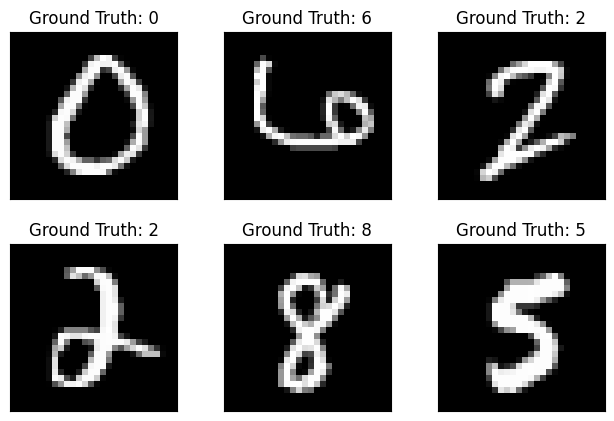

In [17]:
# Let's draw some of the training data

# Get an enumerator for the test_loader
examples = enumerate(test_loader)

# Get the next batch of examples from the enumerator
batch_idx, (example_data, example_targets) = next(examples)

# Create a new figure for plotting
fig = plt.figure()

# Loop through the first 6 examples in the batch
for i in range(6):
    # Create a subplot in a 2x3 grid at position i+1
    plt.subplot(2, 3, i + 1)

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Display the image data in grayscale with no interpolation
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')

    # Set the title of the subplot to the ground truth label
    plt.title("Ground Truth: {}".format(example_targets[i]))

    # Remove x-axis ticks
    plt.xticks([])

    # Remove y-axis ticks
    plt.yticks([])

# Show the figure with all subplots
plt.show()

# II. Methods


1. The code defines two PyTorch neural network models, Net and Net2, with different architectures.

2. It also includes a weights_init function that initializes the weights of the linear layers using Kaimin uniform distribution.

3. The train and test functions are defined to train and evaluate the models on the MNIST dataset, and the code trains and tests both models, tracking their test accuracies.

In [18]:
from os import X_OK

# This class implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3)
        # Dropout for convolutions
        self.drop = nn.Dropout2d()
        # Fully connected layer
        self.fc1 = nn.Linear(338, 10)

    # Define the forward pass of the network
    def forward(self, x):
        # Apply the first convolutional layer
        x = self.conv1(x)
        # Apply dropout to the convolutional layer output
        x = self.drop(x)
        # Apply max pooling with a kernel size of 2
        x = F.max_pool2d(x, 2)
        # Apply ReLU activation function
        x = F.relu(x)
        # Flatten the tensor for the fully connected layer
        x = x.flatten(1)
        # Apply the fully connected layer
        x = self.fc1(x)
        # Apply log softmax to the output
        x = F.log_softmax(x)
        # Return the final output
        return x



In [19]:
# Define a class Net2 that inherits from nn.Module
class Net2(nn.Module):
    # Initialize the layers of the neural network
    def __init__(self):
        # Call the constructor of the parent class nn.Module
        super(Net2, self).__init__()
        # Define the first convolutional layer with 1 input channel, 10 output channels, and a kernel size of 5
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # Define the second convolutional layer with 10 input channels, 20 output channels, and a kernel size of 5
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        # Define a dropout layer for regularization
        self.drop = nn.Dropout2d()
        # Define the first fully connected layer with 320 input features and 50 output features
        self.fc1 = nn.Linear(320, 50)
        # Define the second fully connected layer with 50 input features and 10 output features
        self.fc2 = nn.Linear(50, 10)

    # Define the forward pass of the neural network
    def forward(self, x):
        # Apply the first convolutional layer, followed by ReLU activation and max pooling
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # Apply the second convolutional layer, followed by dropout, ReLU activation, and max pooling
        x = F.relu(F.max_pool2d(self.drop(self.conv2(x)), 2))
        # Flatten the tensor into a 2D tensor with 320 features
        x = x.view(-1, 320)
        # Apply the first fully connected layer followed by ReLU activation
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer followed by log softmax activation
        x = F.log_softmax(self.fc2(x), dim=1)
        # Return the output tensor
        return x

In [20]:
# He initialization of weights
def weights_init(layer_in):
    # Check if the layer is an instance of nn.Linear
    if isinstance(layer_in, nn.Linear):
        # Initialize the weights of the layer using Kaiming uniform distribution
        nn.init.kaiming_uniform_(layer_in.weight)
        # Fill the bias of the layer with zeros
        layer_in.bias.data.fill_(0.0)

In [21]:
# Main training routine

# This code defines the main training routine,
# where the model performs forward and backward passes on each batch,
# updates parameters based on gradients,
# and displays training progress every 10 batches.
def train(epoch, model):
    # Set the model to training mode
    model.train()
    # Iterate over batches of data
    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients of the model parameters
        optimizer.zero_grad()
        # Perform a forward pass through the model
        output = model(data)
        # Compute the negative log likelihood loss
        loss = F.nll_loss(output, target)
        # Perform a backward pass through the model
        loss.backward()
        # Update the model parameters based on the gradients
        optimizer.step()

        # Print training status every 10 batches
        if batch_idx % 10 == 0:
            # Get the index of the max log-probability
            pred = output.data.max(1, keepdim=True)[1]
            # Count correct predictions
            correct = pred.eq(target.data.view_as(pred)).sum()
             # Print training progress
            print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [22]:
# Run on test data
# This code defines a function that evaluates a machine learning model on a test dataset.
# Then, it calculates the average loss and accuracy, and returns the test accuracy.

# Define a function called test that takes an argument model to evaluate
#the performance of the model on the test data.
def test(model):

  # Set the model to evaluation mode
  model.eval()

  # initialize test_loss and correct,
  # to keep track of the total loss and the number of
  # correct predictions on the test dataset.
  test_loss = 0
  correct = 0

  # Disable gradient calculation to save memory
  with torch.no_grad():

    # Iterate over the test_loader
    for data, target in test_loader:

      # Pass the current batch of data through the model
      # and store the output in the output variable
      output = model(data)

      # Calculate the negative log likelihood loss of the output in the test_loss variable
      # size_average=False ensures that the loss is not averaged, but instead summed up.
      test_loss += F.nll_loss(output, target, size_average=False).item()

      # Store the index of the maximum value of the output tensor in the pred variable
      # max(1, keepdim=True) part of the code ensures that the output
      # has the same number of dimensions as the target labels.
      pred = output.data.max(1, keepdim=True)[1]

      # Compare the model's predictions (pred) with the true target labels (target),
      # Count the number of correct predictions, accumulating the result in the correct variable.
      correct += pred.eq(target.data.view_as(pred)).sum()

  # Calculate the average test_loss
  test_loss /= len(test_loader.dataset)

  # Print out the average test loss and the test accuracy as a percentage.
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

  # Return the test accuracy as a percentage
  return 100. * correct / len(test_loader.dataset)

In [23]:
# Train and test Model 1

# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model)
accuracy1 = test(model)


/var/folders/z5/hqqt4z8949bf6xhx7jfq4f_40000gn/T/ipykernel_6233/2053953840.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)



Test set: Avg. loss: 2.4545, Accuracy: 1008/10000 (10%)

Train Epoch: 1 [0/60000]	Loss: 2.608022
Train Epoch: 1 [640/60000]	Loss: 2.397586
Train Epoch: 1 [1280/60000]	Loss: 2.212079
Train Epoch: 1 [1920/60000]	Loss: 2.185869
Train Epoch: 1 [2560/60000]	Loss: 1.876151
Train Epoch: 1 [3200/60000]	Loss: 1.915088
Train Epoch: 1 [3840/60000]	Loss: 1.749066
Train Epoch: 1 [4480/60000]	Loss: 1.581131
Train Epoch: 1 [5120/60000]	Loss: 1.620273
Train Epoch: 1 [5760/60000]	Loss: 1.562097
Train Epoch: 1 [6400/60000]	Loss: 1.311533
Train Epoch: 1 [7040/60000]	Loss: 1.442856
Train Epoch: 1 [7680/60000]	Loss: 1.438558
Train Epoch: 1 [8320/60000]	Loss: 1.494274
Train Epoch: 1 [8960/60000]	Loss: 1.348970
Train Epoch: 1 [9600/60000]	Loss: 1.352128
Train Epoch: 1 [10240/60000]	Loss: 1.210430
Train Epoch: 1 [10880/60000]	Loss: 1.365772
Train Epoch: 1 [11520/60000]	Loss: 1.430260
Train Epoch: 1 [12160/60000]	Loss: 1.085732
Train Epoch: 1 [12800/60000]	Loss: 1.056072
Train Epoch: 1 [13440/60000]	Loss: 1.2

In [ ]:
# Train and test Model 2

# Create network
model2 = Net2()
# Initialize model weights
model2.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model2.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model2)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model2)
accuracy2 = test(model2)


Test set: Avg. loss: 2.3230, Accuracy: 1202/10000 (12%)

Train Epoch: 1 [0/60000]	Loss: 2.533287
Train Epoch: 1 [640/60000]	Loss: 2.177606
Train Epoch: 1 [1280/60000]	Loss: 1.848610
Train Epoch: 1 [1920/60000]	Loss: 1.902125
Train Epoch: 1 [2560/60000]	Loss: 1.600636
Train Epoch: 1 [3200/60000]	Loss: 1.428716
Train Epoch: 1 [3840/60000]	Loss: 1.309780
Train Epoch: 1 [4480/60000]	Loss: 1.263400
Train Epoch: 1 [5120/60000]	Loss: 1.163735
Train Epoch: 1 [5760/60000]	Loss: 0.908543
Train Epoch: 1 [6400/60000]	Loss: 1.017123
Train Epoch: 1 [7040/60000]	Loss: 0.864628
Train Epoch: 1 [7680/60000]	Loss: 0.872780
Train Epoch: 1 [8320/60000]	Loss: 0.762242
Train Epoch: 1 [8960/60000]	Loss: 0.519485
Train Epoch: 1 [9600/60000]	Loss: 0.758604
Train Epoch: 1 [10240/60000]	Loss: 0.513923
Train Epoch: 1 [10880/60000]	Loss: 0.454630
Train Epoch: 1 [11520/60000]	Loss: 0.984696
Train Epoch: 1 [12160/60000]	Loss: 0.589683
Train Epoch: 1 [12800/60000]	Loss: 0.749695
Train Epoch: 1 [13440/60000]	Loss: 0.5

## III. Results

Here we train the CNN model and apply it to the test set. There are 10 epochs in training. There is no validation set here, we simply take the model at the end of the training procedure.

In [ ]:
print(f"Model 1 Accuracy: {round(float(accuracy1.numpy()),2)}%")
print(f"Model 2 Accuracy: {round(float(accuracy2.numpy()),2)}%")

Model 1 Accuracy: 94.05%
Model 2 Accuracy: 98.79%


/var/folders/z5/hqqt4z8949bf6xhx7jfq4f_40000gn/T/ipykernel_6233/2053953840.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


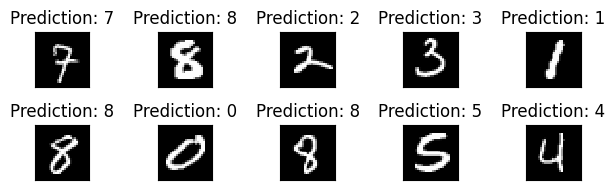

In [ ]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

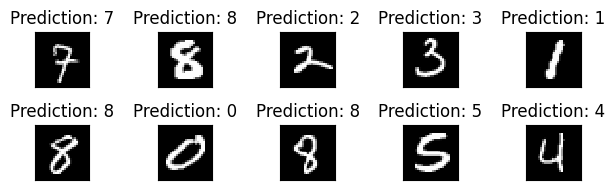

In [ ]:
# Run network on data we got before and show predictions
output = model2(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# IV. Conclusion and Discussion

By evaluating Models 1 and 2, we observe a trade-off between accuracy and computational efficiency. Model 1 has a single convolutional layer and a simple structure, and can complete training quickly (29 seconds), but has lower accuracy. Model 2 improves accuracy by adding additional convolutional layers and dropout for regularization, capturing more complex patterns at the cost of increased computation time (2 minutes). This improvement highlights the effectiveness of additional layers and regularization in learning richer features, but also illustrates the longer running time due to the larger number of parameters.

To further improve accuracy, I introduce Model 3 (Net3), a deeper architecture with three convolutional layers, batch normalization and increased dropout, as well as the Adam optimizer for faster convergence. These new features will allow Net3 to achieve lower loss and higher accuracy by learning more detailed image features and reducing overfitting.

Train Epoch: 1 [0/60000]	Loss: 2.372719
Train Epoch: 1 [640/60000]	Loss: 1.179105
Train Epoch: 1 [1280/60000]	Loss: 0.532271
Train Epoch: 1 [1920/60000]	Loss: 0.216674
Train Epoch: 1 [2560/60000]	Loss: 0.347728
Train Epoch: 1 [3200/60000]	Loss: 0.195594
Train Epoch: 1 [3840/60000]	Loss: 0.256184
Train Epoch: 1 [4480/60000]	Loss: 0.294808
Train Epoch: 1 [5120/60000]	Loss: 0.215527
Train Epoch: 1 [5760/60000]	Loss: 0.088381
Train Epoch: 1 [6400/60000]	Loss: 0.045382
Train Epoch: 1 [7040/60000]	Loss: 0.076285
Train Epoch: 1 [7680/60000]	Loss: 0.190303
Train Epoch: 1 [8320/60000]	Loss: 0.121894
Train Epoch: 1 [8960/60000]	Loss: 0.144341
Train Epoch: 1 [9600/60000]	Loss: 0.130322
Train Epoch: 1 [10240/60000]	Loss: 0.200358
Train Epoch: 1 [10880/60000]	Loss: 0.017295
Train Epoch: 1 [11520/60000]	Loss: 0.186410
Train Epoch: 1 [12160/60000]	Loss: 0.039413
Train Epoch: 1 [12800/60000]	Loss: 0.022208
Train Epoch: 1 [13440/60000]	Loss: 0.025168
Train Epoch: 1 [14080/60000]	Loss: 0.054632
Train Ep

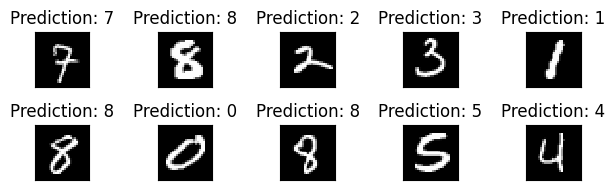

In [ ]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        # First convolutional block
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Dropout layer to reduce overfitting
        self.drop = nn.Dropout(0.25)
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # First convolutional block
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Second convolutional block
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # Third convolutional block
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 128 * 3 * 3)
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        # Output layer with log softmax
        x = F.log_softmax(self.fc2(x), dim=1)
        return x


# Initialize the model, optimizer, and other components
model3 = Net3()
optimizer = optim.Adam(model3.parameters(), lr=0.001)

# Training function
def train_model(model, epochs=10):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 10 == 0:
                print(f'Train Epoch: {epoch+1} [{batch_idx * len(data)}/{len(train_loader.dataset)}]\tLoss: {loss.item():.6f}')

# Testing function
def test_model(model):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Avg. loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')
    return accuracy

# Train and test Net3
train_model(model3, epochs=10)
accuracy3 = test_model(model3)


print(f"Model 3 Accuracy: {round(float(accuracy2.numpy()),2)}%")

# Run network on data we got before and show predictions
output = model3(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# Optimized Model 3 Observation:

**Model 3 (Net3): Improved Convolutional Neural Network for MNIST Classification**

Model 3 is designed with additional complexity and regularization techniques to achieve high accuracy on the MNIST dataset. Different from Models 1 and 2 which use fewer convolutional layers and feature maps, Model 3 includes three convolutional layers with 32, 64 and 128 feature maps respectively, each convoluti#onal layer is followed by batch normalization and Max pooling. This depth enables the model to capture the intricate details and layered patterns in the image data, which are critical for distinguishing similar figures.

**Performance**

Adding batch normalization and dropout to Model 3 makes it more resistant to overfitting and improves its generalization ability. The Adam optimizer can dynamically adjust the learning rate to further accelerate convergence. Therefore, Model 3 achieves a lower average loss of 0.0252 and a higher accuracy of 99.27% ​​on the test set, which is better than Models 1 and 2.

**Compromise: Increased computation time**

Although Model 3 provides greater accuracy, it requires more running time due to its increased complexity:
- Increasing the number of layers and feature maps: significantly increases the computational load because the operations of each layer scale with the number of parameters.
- Batch Normalization and Abort: introduces additional operations that further increase processing time.
- Model 3 takes 4 minutes to run on my local machine, while models 1 and 2 take 29 seconds and 2 minutes respectively.

In summary, Model 3's advanced architecture and regularization strategy provide higher accuracy at the cost of longer execution time, illustrating the trade-off between performance and computational efficiency.